In [21]:
import os
import string
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report


# In[2]:


X = [] # an element of X is represented as (filename,text)
Y = [] # an element of Y represents the newsgroup category of the corresponding X element
for category in os.listdir('text'):
    
    for document in os.listdir('text/'+category):
        with open('text/'+category+'/'+document, "r",encoding='utf-8') as f:
            X.append((document,f.read()))
            Y.append(category)


In [22]:
xe=[]
xp=[]
xst=[]
xs=[]
ye=[]
yp=[]
yst=[]
ys=[]
for category in os.listdir('text'):
    
    for document in os.listdir('text/'+category):
        with open('text/'+category+'/'+document, "r",encoding='utf-8') as f:
            if category=="epic":
                xe.append((document,f.read()))
                ye.append(category)
            elif category=="politics":
                xp.append((document,f.read()))
                yp.append(category)
            elif category=="science and tech":
                xst.append((document,f.read()))
                yst.append(category)
            elif category=="sports":
                xs.append((document,f.read()))
                ys.append(category)
            else:
                pass


In [23]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=0)
xetrain, xetest,yetrain,yetest = model_selection.train_test_split(xe,ye, test_size=0.20, random_state=0)
xptrain, xptest,yptrain,yptest = model_selection.train_test_split(xp,yp, test_size=0.20, random_state=0)
xstrain, xstest,ystrain,ystest = model_selection.train_test_split(xs,ys, test_size=0.20, random_state=0)
xsttrain, xsttest,ysttrain,ysttest = model_selection.train_test_split(xst,yst, test_size=0.20, random_state=0)

print("training set is \n",Y_train,"\n")
print("testing set is \n" ,Y_test)

stopwords_kannada =["ಮತ್ತು" , "ಈ" ,"ಒಂದ",",","." ",", "ರಲ್ಲಿ", "ಹಾಗೂ", "ಎಂದು" ,"ಅಥವಾ" , "ಇದು" , "ರ", "ಅವರು" , "ಎಂಬ" , "ಮೇಲೆ" , "ಅವರ" , "ತನ್ನ" , "ಆದರೆ" , "ತಮ್ಮ" , "ನಂತರ" ,"ಮೂಲಕ", "ಹೆಚ್ಚು", "ನ", "ಆ" ,"ಕೆಲವು", "ಅನೇಕ", "ಎರಡು", "ಹಾಗು", "ಪ್ರಮುಖ", "ಇದನ್ನು", "ಇದರ", "ಸುಮಾರು", "ಅದರ", "ಅದು", "ಮೊದಲ", "ಬಗ್ಗೆ ", "ನಲ್ಲಿ ", "ರಂದು", "ಇತರ", " ಅತ್ಯಂತ", "ಹೆಚ್ಚಿನ", "ಸಹ" , "ಸಾಮಾನ್ಯವಾಗಿ", "ನೇ", "ಹಲವಾರು", "ಹೊಸ", "ದಿ","ಕಡಿಮೆ", "ಯಾವುದೇ",  "ಹೊಂದಿದೆ",  "ದೊಡ್ಡ",  "ಅನ್ನು", "ಇವರು", "ಪ್ರಕಾರ" , "ಇದೆ", "ಮಾತ್ರ" ,"ಕೂಡ", "ಇಲ್ಲಿ", "ಎಲ್ಲಾ", "ವಿವಿಧ", "ಅದನ್ನು", "ಹಲವು","ರಿಂದ", "ಕೇವಲ", "ದ","ದಕ್ಷಿಣ", "ಗೆ", "ಅವನ", "ಅತಿ", "ನೆಯ", "ಬಹಳ", "ಕೆಲಸ", "ಎಲ್ಲ",  "ಪ್ರತಿ", "ಇತ್ಯಾದಿ" ,"ಇವು ","ಬೇರೆ ","ಹೀಗೆ","ನಡುವೆ","ಇದಕ್ಕೆ", "ಎಸ್", "ಇವರ", "ಮೊದಲು", "ಶ್ರೀ", "ಮಾಡುವ", "ಇದರಲ್ಲಿ", "ರೀತಿಯ", "ಮಾಡಿದ", "ಕಾಲ", "ಅಲ್ಲಿ", "ಮಾಡಲು", "ಅದೇ", "ಈಗ", "ಅವು","ಗಳು", "ಎ", "ಎಂಬುದು", "ಅವನು", "ಅಂದರೆ", "ಅವರಿಗೆ", "ಇರುವ", "ವಿಶೇಷ", "ಮುಂದೆ", "ಮುಂತಾದ", "ಮೂಲ", "ಬಿ", "ಮೀ", "ಒಂದೇ", "ಇನ್ನೂ", "ಹೆಚ್ಚಾಗಿ", "ಮಾಡಿ","ಅವರನ್ನು", "ಇದೇ", "ಯ", "ರೀತಿಯಲ್ಲಿ", "ಅದರಲ್ಲಿ", "ಮಾಡಿದರು", "ನಡೆದ", "ಆಗ", "ಮತ್ತೆ", "ಪೂರ್ವ", "ಆತ", "ಬಂದ",  "ಯಾವ", "ಒಟ್ಟು", "ಇತರೆ", "ಹಿಂದೆ",  "ಪ್ರಮಾಣದ", "ಗಳನ್ನು", "ಕುರಿತು", "ಯು", "ಆದ್ದರಿಂದ", "ಅಲ್ಲದೆ", "ನಗರದ", "ಮೇಲಿನ", "ಏಕೆಂದರೆ", "ರಷ್ಟು", "ಎಂಬುದನ್ನು","ಬಾರಿ", "ಎಂದರೆ", "ಹಿಂದಿನ", "ಆದರೂ", "ಆದ", "ಸಂಬಂಧಿಸಿದ", "ಮತ್ತೊಂದು", "ಸಿ", "ಆತನ","ಕ"] 




training set is 
 ['epic', 'epic', 'politics', 'science and tech', 'politics', 'science and tech', 'politics', 'politics', 'epic', 'epic', 'politics', 'politics', 'politics', 'politics', 'politics', 'epic', 'science and tech', 'epic', 'epic', 'epic', 'epic', 'epic', 'epic', 'epic', 'epic', 'politics', 'science and tech', 'politics', 'epic', 'epic', 'epic', 'politics', 'politics', 'epic', 'politics', 'epic', 'epic', 'epic', 'science and tech', 'politics', 'sports', 'science and tech', 'epic', 'science and tech', 'epic', 'politics', 'epic', 'epic', 'politics', 'sports', 'sports', 'politics', 'politics', 'politics', 'epic', 'sports', 'politics', 'politics', 'epic', 'epic', 'politics', 'science and tech', 'politics', 'science and tech', 'epic', 'politics', 'politics', 'epic', 'science and tech', 'politics', 'politics', 'politics', 'epic', 'epic', 'politics', 'epic', 'sports', 'sports', 'politics', 'politics', 'politics', 'politics'] 

testing set is 
 ['politics', 'epic', 'politics', 'epic

In [24]:
import re

In [25]:
vocab = {}
for i in range(len(X_train)):
    word_list = []
    for word in X_train[i][1].split():
        word_new  = word.strip(string.punctuation)
        if (len(word_new)>2)  and (word_new not in stopwords_kannada):  
            if word_new in vocab:
                vocab[word_new]+=1
            else:
                vocab[word_new]=1  


In [26]:
#preprocessing of data hereremoving of stopwords
vocabp = {}
for i in range(len(xptrain)):
    word_list = []
    for word in xptrain[i][1].split():
        word_new  = word.strip(string.punctuation)
        if (len(word_new)>2)  and (word_new not in stopwords_kannada):  
            if word_new in vocabp:
                vocabp[word_new]+=1
            else:
                vocabp[word_new]=1 
vocabe = {}
for i in range(len(xetrain)):
    word_list = []
    for word in xetrain[i][1].split():
        word_new  = word.strip(string.punctuation)
        if (len(word_new)>2)  and (word_new not in stopwords_kannada):  
            if word_new in vocabe:
                vocabe[word_new]+=1
            else:
                vocabe[word_new]=1
vocabst = {}
for i in range(len(xsttrain)):
    word_list = []
    for word in xsttrain[i][1].split():
        word_new  = word.strip(string.punctuation)
        if (len(word_new)>2)  and (word_new not in stopwords_kannada):  
            if word_new in vocabst:
                vocabst[word_new]+=1
            else:
                vocabst[word_new]=1
vocabs= {}
for i in range(len(xstrain)):
    word_list = []
    for word in xstrain[i][1].split():
        word_new  = word.strip(string.punctuation)
        if (len(word_new)>2)  and (word_new not in stopwords_kannada):  
            if word_new in vocabs:
                vocabs[word_new]+=1
            else:
                vocabs[word_new]=1


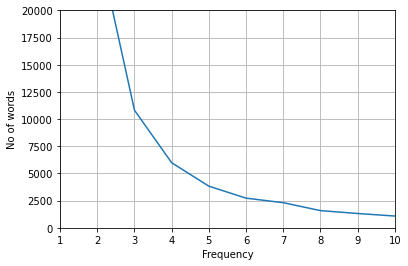

In [27]:
num_words = [0 for i in range(max(vocab.values())+1)] 
freq = [i for i in range(max(vocab.values())+1)] 
for key in vocab:
    num_words[vocab[key]]+=1
plt.plot(freq,num_words)
plt.axis([1, 10, 0, 20000])
plt.xlabel("Frequency")
plt.ylabel("No of words")
plt.grid()
plt.show()

In [28]:
cutoff_freq = 20
# For deciding cutoff frequency
num_words_above_cutoff = len(vocab)-sum(num_words[0:cutoff_freq]) 
print("Number of words with frequency higher than cutoff frequency({}) :".format(cutoff_freq),num_words_above_cutoff)


Number of words with frequency higher than cutoff frequency(20) : 5809


In [29]:
#feature extraction
features = []
for key in vocab:
    if vocab[key] >=cutoff_freq:
        features.append(key)

cf=40        

fp = []
for key in vocabp:
    if vocabp[key] >=cf:
        fp.append(key)


fe = []
for key in vocabe:
    if vocabe[key] >=cf:
        fe.append(key)

fst = []
cfst=10
for key in vocabst:
    if vocabst[key] >=cfst:
        fst.append(key)

fs = []
cfreq=1
for key in vocabs:
    if vocabs[key] >=cfreq:
        fs.append(key)
        

for i in range(len(fst)):
   fst[i]=re.sub(r'[0-9]|[೦-೯]','',fst[i])
for i in range(len(fs)):
   fs[i]=re.sub(r'[0-9]|[೦-೯]','',fs[i])
for i in range(len(fp)):
   fp[i]=re.sub(r'[0-9]|[೦-೯]','',fp[i])
for i in range(len(fe)):
   fe[i]=re.sub(r'[0-9]|[೦-೯]','',fe[i])
print(fst)


['ಕ್ರಿಯೆ', 'ರಾಸಾಯನಿಕ', 'ಕ್ರಿಯೆಯಲ್ಲಿ', 'ಬೆಳಕಿನ', 'ರೂಪದಲ್ಲಿ', 'ಇಂತಹ', 'ಉಷ್ಣ', '', 'ಶಕ್ತಿಯನ್ನು', 'ಉತ್ಪನ್ನಗಳು', 'ಹೊಂದಿರುತ್ತದೆ', 'ಟ್\u200c', 'ದಹನ', 'ಎನ್ನುವರು', 'ಲ್ಲಿ', '', '॥[', '', 'ಓಂದು', 'ಒಂದು', 'ಸಂದರ್ಭದಲ್ಲಿ', 'ಉದಾ', 'ಆಥವಾ', 'ಬಳಸುವ', 'ಕಾರ್ಬನ್\u200c', 'ಬಳಸುತ್ತಾರೆ', 'ಟ್ರ', 'ಕ್ಕ', 'ಆಮ್ಲಗಳು', 'ಹಸಿರು', 'ಕ್ರ', 'ನ್ನ', 'ಆಹಾರ', 'ಹಾಸ', 'ನ್ನು', 'ಕರೆಯುತ್ತಾರೆ', 'ದ್ಯುತಿ', 'ಮಾನವನ', 'ದೇಹದಲ್ಲಿ', 'ವಸ್ತುಗಳು', 'ಸೇರಿ', 'ಉತ್ಪತ್ತಿಯಾಗುವ', 'ಹೊಂದಿ', 'ಉಂಟಾಗುತ್ತದೆ', 'ಸಂಯುಕ್ತಗಳು', 'ನೊಬೆಲ್\u200c', 'ವಿಧಾನದಲ್ಲಿ', 'ಸಂಯುಕ್ತ', 'ಸಾಮಾನ್ಯ', 'ಹ್\u200c', 'ತ್ಯ', 'ಇಂಗಾಲ', 'ತಯಾರಿಕೆಯಲ್ಲಿ', 'ಬಳಕೆ', 'ಮಾಡುತ್ತಾರೆ', 'ಲವಣಗಳು', 'ಬಣ್ಣದ', 'ಬೆಳಕನ್ನು', 'ಗ್ರಾಂ', 'ಕಾಯಿಸಿ', 'ಕಾರಣ', 'ಅನಿಲ', 'ಕ್ಲೋರೈಡ್\u200c', 'ವಿದ್ಯುತ್\u200c', 'ಧಾತು', 'ನೀರು', 'ಜಲಜನಕ', 'ಗ್ಯ', 'ಸ್ಯ', 'ಸತುವಿನ', 'ತಾಪ', 'ತಾತ', 'ಡ್\u200c', 'ತ್\u200c', 'ಜ್ಯ', 'ಸಸ್ಯ', 'ಜ್\u200c', 'ಷ್\u200c', 'ಸೋಡಿಯಂ', 'ದ್ರಾವಣ', 'ಕ್ಟ', 'ಕ್ಯಾಲ್ಸಿಯಂ', 'ಫ್\u200c', 'ಕ್ಮ', 'ವರ್ತಿಸಿ', 'ನೀರಿನಲ್ಲಿ', 'ಲವಣ', 'ಕ್ರಿಯೆಗೆ', 'ನೀರಿನ', 'ಗಡಸು', 'ನೀರನ್ನು', 'ದುರ್ಬಲ', 'ಆಮ್ಲ', 'ಆತಿ', 'ಹಾವ', 'ಹಾಯಿಸಿದಾಗ', 'ಕಬ್ಬಿಣದ', 'ಕಬ್ಬಿಣ', 'ಸ

In [30]:
xptrain_dataset = np.zeros((len(xptrain),len(features)))
# This can take some time to complete
for i in range(len(xptrain)):
   # print(i) # Uncomment to see progress
    word_list = [ word for word in xptrain[i][1].split()]
    for word in word_list:
        if word in features:
            xptrain_dataset[i][features.index(word)] += 1
print(xptrain_dataset)



xptest_dataset = np.zeros((len(xptest),len(features)))
# This can take some time to complete
for i in range(len(xptest)):
    # print(i) # Uncomment to see progress
    word_list = [ word for word in xptest[i][1].split()]
    for word in word_list:
        if word in features:
            xptest_dataset[i][features.index(word)] += 1
print(xptest_dataset)

[[ 56.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [129.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [ 14.   0.  25. ...   0.   0.   0.]
 [ 34.   0.   0. ...   0.   0.   0.]]
[[ 2.  0.  0. ...  0.  1.  0.]
 [28.  0. 24. ...  0.  0.  0.]
 [16.  0. 23. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 7.  0.  0. ...  0.  0.  0.]
 [21.  0.  0. ...  0.  0.  0.]]


In [31]:



X_test_datasetepic= np.zeros((len(xe),len(features)))
# This can take some time to complete
for i in range(len(xe)):
    # print(i) # Uncomment to see progress
    word_list = [ word for word in xe[i][1].split()]
    
    for word in word_list:
        if word in fe:
            X_test_datasetepic[i][fe.index(word)] += 1
 

X_test_datasets= np.zeros((len(xs),len(features)))
# This can take some time to complete
for i in range(len(xs)):
    # print(i) # Uncomment to see progress
    word_list = [ word for word in xs[i][1].split()]
    
    for word in word_list:
        if word in fs:
            X_test_datasets[i][fs.index(word)] += 1
#print(X_test_datasets)  


X_test_datasetp= np.zeros((len(xp),len(features)))
# This can take some time to complete
for i in range(len(xp)):
    # print(i) # Uncomment to see progress
    word_list = [ word for word in xp[i][1].split()]
    
    for word in word_list:
        if word in fp:
            X_test_datasetp[i][fp.index(word)] += 1
#print(X_test_datasetp)  

X_test_datasetst= np.zeros((len(xst),len(features)))
# This can take some time to complete
for i in range(len(xst)):
    # print(i) # Uncomment to see progress
    word_list = [ word for word in xst[i][1].split()]
    
    for word in word_list:
        if word in fst:
            X_test_datasetst[i][fst.index(word)] += 1
        else:
            pass
print(X_test_datasetst)  
        
        




[[ 3.  7.  3. ...  0.  0.  0.]
 [ 2. 16.  1. ...  0.  0.  0.]
 [ 3.  9.  3. ...  0.  0.  0.]
 ...
 [ 3.  3.  1. ...  0.  0.  0.]
 [ 9. 22.  4. ...  0.  0.  0.]
 [ 1.  2.  1. ...  0.  0.  0.]]


In [32]:
xtrain_dataset = np.zeros((len(xptrain),len(features)))
# This can take some time to complete
for i in range(len(xptrain)):
   # print(i) # Uncomment to see progress
    word_list = [ word for word in xptrain[i][1].split()]
    for word in word_list:
        if word in features:
            xtrain_dataset[i][features.index(word)] += 1
print(xtrain_dataset)


[[ 56.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [129.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [ 14.   0.  25. ...   0.   0.   0.]
 [ 34.   0.   0. ...   0.   0.   0.]]


In [33]:
X_train_dataset = np.zeros((len(X_train),len(features)))
# This can take some time to complete
for i in range(len(X_train)):
   # print(i) # Uncomment to see progress
    word_list = [ word for word in X_train[i][1].split()]
    for word in word_list:
        if word in features:
            X_train_dataset[i][features.index(word)] += 1



X_test_dataset = np.zeros((len(X_test),len(features)))
# This can take some time to complete
for i in range(len(X_test)):
    # print(i) # Uncomment to see progress
    word_list = [ word for word in X_test[i][1].split()]
    for word in word_list:
        if word in features:
            X_test_dataset[i][features.index(word)] += 1

In [34]:

clf = MultinomialNB()
clf.fit(X_train_dataset,Y_train)
Y_test_pred = clf.predict(X_test_dataset)
print("predicted testing set is")
print(Y_test_pred)

#clf = MultinomialNB()
#clf.fit(xptrain_dataset,yptrain)
#Y_test_pred = clf.predict(xptest_dataset)
#print("predicted testing set is")
#print(Y_test_pred)


sklearn_score_train = clf.score(X_train_dataset,Y_train)
#print("Sklearn's score on training data :",sklearn_score_train)
sklearn_score_test = clf.score(X_test_dataset,Y_test)
print("Sklearn's score on testing data :",sklearn_score_test)
print("Classification report for testing data :-")
print(classification_report(Y_test, Y_test_pred))

#sklearn_score_train = clf.score(xptrain_dataset,yptrain)
#print("Sklearn's score on training data :",sklearn_score_train)
#sklearn_score_test = clf.score(xptest_dataset,yptest)
#print("Sklearn's score on testing data :",sklearn_score_test)
#print("Classification report for testing data :-")
#print(classification_report(yptest, Y_test_pred))



predicted testing set is
['politics' 'epic' 'politics' 'epic' 'epic' 'science and tech' 'sports'
 'science and tech' 'science and tech' 'science and tech' 'politics'
 'epic' 'politics' 'politics' 'politics' 'politics' 'epic' 'politics'
 'politics' 'politics' 'sports' 'science and tech' 'epic'
 'science and tech' 'epic' 'epic' 'politics' 'sports']
Sklearn's score on testing data : 0.8214285714285714
Classification report for testing data :-
                  precision    recall  f1-score   support

            epic       1.00      0.73      0.84        11
        politics       1.00      0.92      0.96        12
science and tech       0.33      1.00      0.50         2
          sports       0.67      0.67      0.67         3

        accuracy                           0.82        28
       macro avg       0.75      0.83      0.74        28
    weighted avg       0.92      0.82      0.85        28



In [35]:





a=[]
a=X_train[4][1]
print(a)
X_test_dataset1 = np.zeros((len(X_test),len(features)))
for i in range(len(X_test)):
   # print(i) # Uncomment to see progress
    word_list = [ word for word in a.split()]
   
    for word in word_list:
        if word in features:
            X_test_dataset1[i][features.index(word)] += 1

print(X_test_dataset1[[0]]) 


clf1 = MultinomialNB()
clf1.fit(X_train_dataset,Y_train)
Y_test_pred1= clf1.predict(X_test_dataset1[[0]])
print(Y_test_pred1)

ಣ ಕಾರ್ಯವನ್ನು
ಅಧಿಕ ಬೆಲೆಯಲ್ಲಿ ಗುತ್ತಿಗೆಗೆ ನೀಡಿದುದರಿ೦ದ, ಪ್ರಾಂತೀಯ ಸಾರ್ವಜನಿಕ ಕಾಮಗಾರಿ ಇಲಾಖೆ
ಅನಿವಾರ್ಯವಾಗಿ ವಿರೋಧವನ್ನು ವ್ಯಕ್ರಪಡಿಸಿದೆಯೇ?

ಆ) ಈ ವಿರೋಧವನ್ನು ಪರಿಗಣಿಸಿ, ದರಗಳನ್ನು ಪರಿಷ್ಠರಿಸಲೆಂದೇ ಒಂದು ಸಮಿತಿಯನ್ನು
ರಚಿಸಿದ್ದು, ಆ ಸಮಿತಿಯು ಚೀಫ್‌ ಇಂಜಿನಿಯರ್‌ ನೀಡಿದ ಬೆಲೆಯಲ್ಲಿ ೧/೩ ಅಂಶ ಕಡಿತ
ಮಾಡಿದುದು ಸತ್ಯವೇ?

ಇ) ಗುತ್ತಿಗೆದಾರರೂ ಬೆಲೆಯಲ್ಲಿ ಸೂಚಿಸಲಾದ ಕಡಿತವನ್ನು ಒಪ್ಪಿಕೊ೦ಡಿದ್ದು ಮೊದಲು ನೀಡಿದ
ಬೆಲೆಗಳು ತುಂಬಾ ಅಧಿಕವಾದುದು ಎಂದು ಹೇಳಿರುವುದೇ ಸತ್ಯವೇ?

 

* ಲೆಜಿಸ್ಲೇಟಿವ್‌ ಅಸೆಂಬ್ಲಿ ಡಿಬೇಟ್ಸ್‌ (ಕೇಂದ್ರ ಸಂ ೧, ೧೯, ಫೆಬ್ರವರಿ ೧೯೪೩ ಪು. ೪೧೭-೧೮
೫೫ " ಪ್ರಶ್ರೆಯ ಉತ್ತರವನ್ನು ಸದಸ್ಯ [ರ ಗೈರುಹಾಜರಿಯಿಂದಾಗಿ ಸದನದ ಮುಂದೆ ಇರಿಸಲಾಗಿದೆ.
ಡಾ. ಬಾಬಾ ಸಾಹೇಬ್‌ ಆಂಬೇಡ್ಕರ್‌ ಅವರ ಸಮಗ್ರ ಬರೆಹಗಳು ಮತ್ತು ಭಾಷಣಗಳು ಸಂಪುಟ-೯ ೪೩

ಈ) ಇ) ಗೆ ಸಂಬಂಧಿಸಿದ ಉತ್ತರವು ಸರಿ ಎ೦ದರೆ ಚೀಫ್‌ ಇಂಜಿನಿಯರ್‌ ಅವರ ವಿರುದ್ಧ
ಸರ್ಕಾರ ಕೈಗೊಂಡಿರುವ ಕ್ರಮವೇನು?
ಗೌರವಾನ್ವಿತ ಡಾ| ಬಿ. ಆರ್‌. ಅಂಬೇಡ್ಕರ್‌ : ಅ) ವಿಮಾನ ನಿಲ್ದಾಣ ನಿರ್ಮಾಣದ ದರಗಳು
ಇಲಾಖೆಯ ಆಡಳಿತ ಹಾಗೂ ಸೂಪರಿಂಟೆಂಡೆ೦ಟ್‌ ಇ೦ಜಿನಿಯರುಗಳಿಂದ ಶಿಫಾರಸ್ಸು ಪಡೆದು ಇಲಾಖೆಯ
ಕ್ರಮದಂತೆ ಮುಖ್ಯ ಇಂಜಿನಿಯರು ನಿರ್ಣಯಿಸಿದ್ದಾರೆ. ವಿಮಾನ ನಿಲ್ದಾಣ ಕಾರ್ಯ ಆರಂಭಗೊಂಡಾಗ
ನಂಬಿಕೆಯ ಗುತ್ತೇದಾರರು ಕಡಿಮೆ ಬೆಲೆಗೆ ಕಾರ್ಯ ಮಾಡಲು ಸಿದ್ಧರಿರಲಿಲ್ಲ. ಹೀ

In [36]:
print(X_test_dataset1[[0]]) 


clf1 = MultinomialNB()
clf1.fit(X_train_dataset,Y_train)
Y_test_pred1= clf1.predict(X_test_dataset1[[0]])
print(Y_test_pred1)

[[55.  0. 22. ...  0.  0.  0.]]
['politics']


In [37]:
class MultinomialNaiveBayes:
    
    def __init__(self):
        # count is a dictionary which stores several dictionaries corresponding to each news category
        # each value in the subdictionary represents the freq of the key corresponding to that news category 
        self.count = {}
        # classes represents the different news categories
        self.classes = None
    
    def fit(self,X_train,Y_train):
        # This can take some time to complete       
        self.classes = set(Y_train)
        for class_ in self.classes:
            self.count[class_] = {}
            for i in range(len(X_train[0])):
                self.count[class_][i] = 0
            self.count[class_]['total'] = 0
            self.count[class_]['total_points'] = 0
        self.count['total_points'] = len(X_train)
        
        for i in range(len(X_train)):
            for j in range(len(X_train[0])):
                self.count[Y_train[i]][j]+=X_train[i][j]
                self.count[Y_train[i]]['total']+=X_train[i][j]
            self.count[Y_train[i]]['total_points']+=1
    
    def __probability(self,test_point,class_):
        
        log_prob = np.log(self.count[class_]['total_points']) - np.log(self.count['total_points'])
        total_words = len(test_point)
        for i in range(len(test_point)):
            current_word_prob = test_point[i]*(np.log(self.count[class_][i]+1)-np.log(self.count[class_]['total']+total_words))
            log_prob += current_word_prob
        
        return log_prob
    
    
    def __predictSinglePoint(self,test_point):
        
        best_class = None
        best_prob = None
        first_run = True
        
        for class_ in self.classes:
            log_probability_current_class = self.__probability(test_point,class_)
            if (first_run) or (log_probability_current_class > best_prob) :
                best_class = class_
                best_prob = log_probability_current_class
                first_run = False
                
        return best_class
        
  
    def predict(self,X_test):
        # This can take some time to complete
        Y_pred = [] 
        for i in range(len(X_test)):
        # print(i) # Uncomment to see progress
            Y_pred.append( self.__predictSinglePoint(X_test[i]) )
        
        return Y_pred
    
    def score(self,Y_pred,Y_true):
        # returns the mean accuracy
        count = 0
        for i in range(0,len(Y_pred)):
            if Y_pred[i] == Y_true[i]:
                count+=1
        return count/len(Y_pred)


In [38]:
clf2 = MultinomialNaiveBayes()
clf2.fit(X_train_dataset,Y_train)
Y_test_pred = clf2.predict(X_test_dataset)
Y_test_pred1 = clf2.predict(X_test_dataset1[[0]])

print(Y_test_pred1)
our_score_test = clf2.score(Y_test_pred,Y_test)  
print("Our score on testing data :",our_score_test)
#print("Classification report for testing data :-")
#print(classification_report(Y_test, Y_test_pred1))


['politics']
Our score on testing data : 0.8214285714285714


In [39]:

print("Score of our model on test data:",our_score_test)
print("Score of inbuilt sklearn's MultinomialNB on the same data :",sklearn_score_test)

Score of our model on test data: 0.8214285714285714
Score of inbuilt sklearn's MultinomialNB on the same data : 0.8214285714285714
